# Task 1 - Image filtering and edges detection

In [1]:
#import necessary libraries
import cv2 
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import scipy.io

Text(0.5, 1.0, 'OrigCopduc')

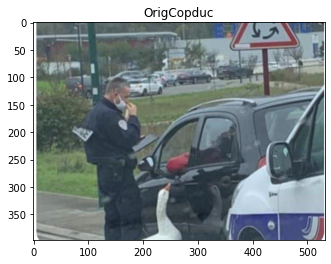

In [2]:
#open the original image as OrigCopduc with cv2 library
OrigCopduc = cv2.imread("copduck.png")

#show OrigCopduc image with plt
org_img = Image.open('copduck.png') 
plt.imshow(org_img)
plt.title("OrigCopduc")

Text(0.5, 1.0, 'B3 Filtered Image')

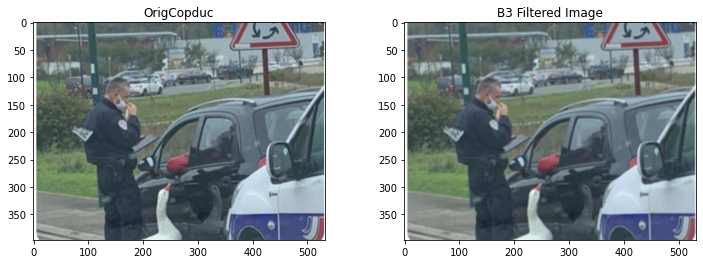

In [4]:
#apply 3x3 box filter from cv2 library to original img OrigCopduc
B3Copduck = cv2.boxFilter(OrigCopduc, -1, (3,3))

#write and read the B3 blurred image 
cv2.imwrite('blurred_duck.png', B3Copduck)
b3img = cv2.imread('blurred_duck.png')

#display the original image and blurred image with concatenate func
#disp = np.concatenate((OrigCopduc, b3img), axis=1)

#this helps to maintain the original RGB colors of the image
orig_img = cv2.cvtColor(OrigCopduc, cv2.COLOR_BGR2RGB)
b3_img = cv2.cvtColor(b3img, cv2.COLOR_BGR2RGB)


#‘OrigCopduck’ with ‘B3’ and display it nearby ‘OrigCopduck’
fig, ax = plt.subplots(1,2)
ax[0].imshow(orig_img) #show org img
ax[1].imshow(b3_img) #show b3 filtered img
plt.subplots_adjust(right = 1.7)
ax[0].set_title("OrigCopduc")
ax[1].set_title("B3 Filtered Image") #blurred image


Text(0.5, 1.0, 'B5 Filtered Image with creating array')

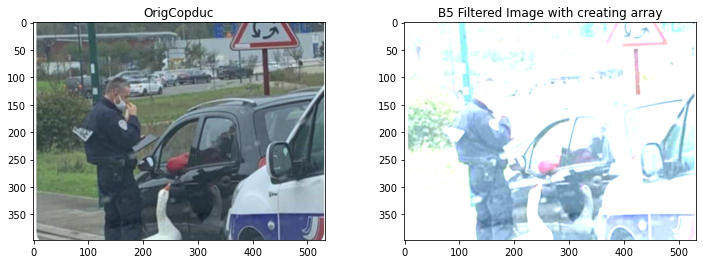

In [10]:
#by creating the b3 filter with array

b3mask = np.array([[1, 1, 1], 
                   [1, 1, 1], 
                   [1, 1, 1]] )

b3mask = b3mask / sum(b3mask)

#apply 3x3 box filter 
imgb3 = cv2.filter2D(OrigCopduc,-1,b3mask)


cv2.imwrite('B3filter.png',imgb3)
b3 = cv2.imread("B3filter.png")

b3_img2 = cv2.cvtColor(b3, cv2.COLOR_BGR2RGB)


#‘OrigCopduck’ with ‘B3’ and display it nearby ‘OrigCopduck’
fig, ax = plt.subplots(1,2)
ax[0].imshow(org_img) #show org img
ax[1].imshow(b3_img2) #show b3 filtered img
plt.subplots_adjust(right = 1.7)
ax[0].set_title("OrigCopduc")
ax[1].set_title("B3 Filtered Image with creating array") #blurred image

In [8]:
#apply 5x5 box filter from cv2 library to original img
B5Copduck = cv2.boxFilter(OrigCopduc, -1, (5,5))

#write and read the blurred image to png file
cv2.imwrite('blurred_duck2.png', B5Copduck)
b5img = cv2.imread('blurred_duck2.png')

#display the original image and blurred images with concatenate func
disp2 = np.concatenate((OrigCopduc,b3img, b5img), axis=1)

#after running this cell without commenting imshow, the kernel stops ?

#cv2.imshow('original, b3 and b5 filtered image', disp2) 
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Text(0.5, 1.0, 'B5 Filtered Image with creating array')

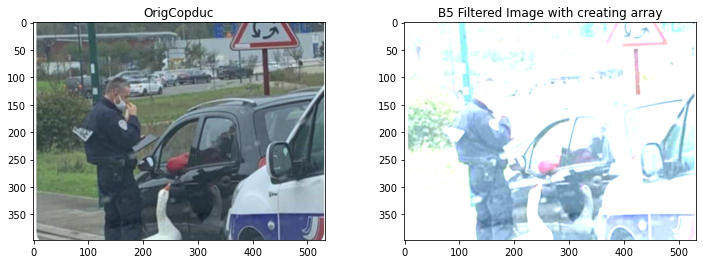

In [9]:
#by creating the b5 filter with array

b5mask = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])

b5mask = b5mask / sum(b5mask)

#apply 5x5 box filter 
imgb5 = cv2.filter2D(OrigCopduc,-1,b5mask)

cv2.imwrite('B5filter.png',imgb3)
b5 = cv2.imread("B5filter.png")

b5_img2 = cv2.cvtColor(b5, cv2.COLOR_BGR2RGB)


#‘OrigCopduck’ with ‘B5’ and display it nearby ‘OrigCopduck’
fig, ax = plt.subplots(1,2)
ax[0].imshow(org_img) #show org img
ax[1].imshow(b5_img2) #show b5 filtered img
plt.subplots_adjust(right = 1.7)
ax[0].set_title("OrigCopduc")
ax[1].set_title("B5 Filtered Image with creating array") #blurred image

Text(0.5, 1.0, 'Edges in Copduck with ED3')

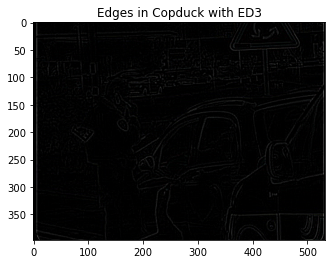

In [13]:
#apply laplacian filter to original img with creating an array (mask)

ED3 = np.array([[0 ,1 ,0] ,[1 ,-4 ,1],[0 ,1 ,0]])

ED3Copduck = cv2.filter2D(OrigCopduc, cv2.CV_16S, ED3)

cv2.imwrite('lap_duck2.png',ED3Copduck) #write image
cv2.imread('lap_duck2.png') #read image

imgl = Image.open('lap_duck2.png') 
plt.imshow(imgl,'gray')
plt.title("Edges in Copduck with ED3")

Text(0.5, 1.0, 'Horizontal edges in Copduck with Roberts mask')

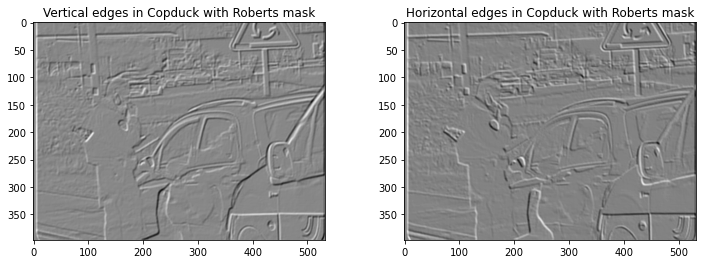

In [14]:
#R1-st derivative Roberts edge detection mask

#grayscaling the b3 filtered blurred image in order to apply roberts mask
gray_b3 = cv2.cvtColor(b3img, cv2.COLOR_BGR2GRAY)

#Roberts operator 
R_x = np.array([[1,0],[0,-1]], dtype=int)
R_y = np.array([[0,-1],[1,0]], dtype=int)

x = cv2.filter2D(gray_b3, cv2.CV_16S, R_x)
y = cv2.filter2D(gray_b3, cv2.CV_16S, R_y)


fig, ax = plt.subplots(1,2)
ax[0].imshow(x,'gray') #vertical edges
ax[1].imshow(y,'gray') #horizontal edges
plt.subplots_adjust(right = 1.7)
ax[0].set_title("Vertical edges in Copduck with Roberts mask")
ax[1].set_title("Horizontal edges in Copduck with Roberts mask") 




Text(0.5, 1.0, 'Roberts mask gradient image')

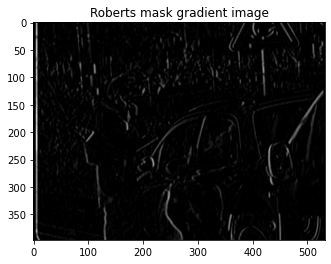

In [15]:
Roberts = cv2.addWeighted(x,0.5,y,0.5,0) #creating the gradient mask with weights

cv2.imwrite('roberts.png',Roberts) #write img
cv2.imread('roberts.png') #read image

imgr = Image.open('roberts.png') 
plt.imshow(imgr,'gray')
plt.title("Roberts mask gradient image")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sobel Horizontal')

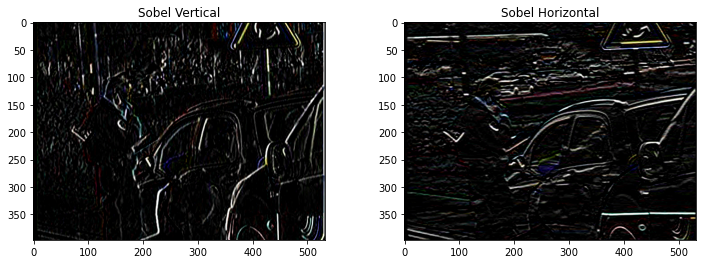

In [16]:
#Sobel mask with creating Sobel edge detection masks 

S_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=int) #for vertical
S_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype=int) #for horizontal

#applying sobel masks to the original copduck image
x = cv2.filter2D(OrigCopduc, cv2.CV_16S, S_x) 
y = cv2.filter2D(OrigCopduc, cv2.CV_16S, S_y)

#show horizontal and vertical edges in Copduck with Sobel mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(x,'gray') #vertical edges
ax[1].imshow(y,'gray') #horizontal edges
plt.subplots_adjust(right = 1.7)
ax[0].set_title("Sobel Vertical")
ax[1].set_title("Sobel Horizontal") 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sobel Horizontal')

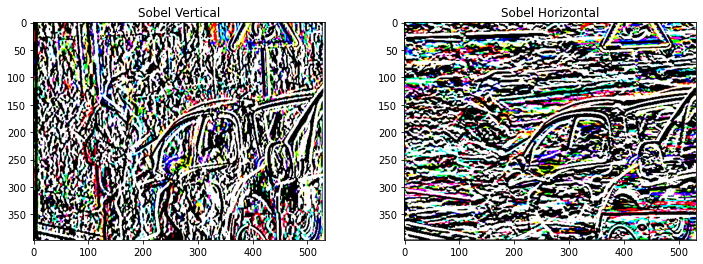

In [17]:
#Sobel mask with cv2.Sobel() function directly from library (with ksize = 5)

sobelx = cv2.Sobel(OrigCopduc,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(OrigCopduc,cv2.CV_64F,0,1,ksize=5)  # y


fig, ax = plt.subplots(1,2)
ax[0].imshow(sobelx,'gray') #vertical edges
ax[1].imshow(sobely,'gray') #horizontal edges
plt.subplots_adjust(right = 1.7)
ax[0].set_title("Sobel Vertical")
ax[1].set_title("Sobel Horizontal") 


Text(0.5, 1.0, 'Sobel Horizontal')

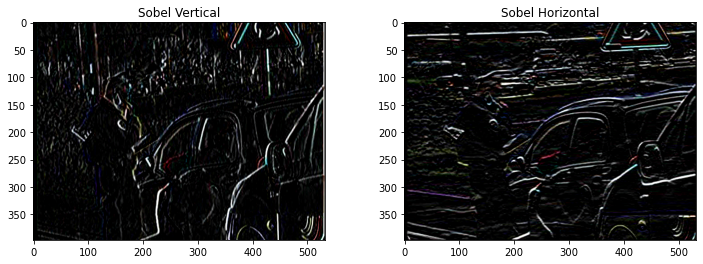

In [18]:
#Sobel mask with cv2.Sobel() function (with ksize = 3)

sobelx = cv2.Sobel(OrigCopduc, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(OrigCopduc, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)


cv2.imwrite('sobelx.png',sobelx) #write image
cv2.imread('sobelx.png') #read image
cv2.imwrite('sobely.png',sobely) #write image
cv2.imread('sobely.png') #read image

imgx = Image.open('sobelx.png') 
imgy = Image.open('sobely.png') 


fig, ax = plt.subplots(1,2)
ax[0].imshow(imgx,'gray') #vertical edges
ax[1].imshow(imgy,'gray') #horizontal edges
plt.subplots_adjust(right = 1.7)
ax[0].set_title("Sobel Vertical")
ax[1].set_title("Sobel Horizontal") 


Text(0.5, 1.0, 'The Sobel operator applied to Copduck')

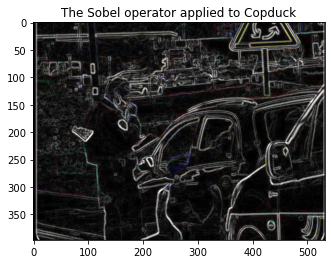

In [19]:
#Create and show ‘The Sobel operator applied to Copduck’

sob = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0) #creating the gradient mask with weights

plt.imshow(sob,'gray')
plt.title("The Sobel operator applied to Copduck")

Text(0.5, 1.0, 'Prewitt Horizontal')

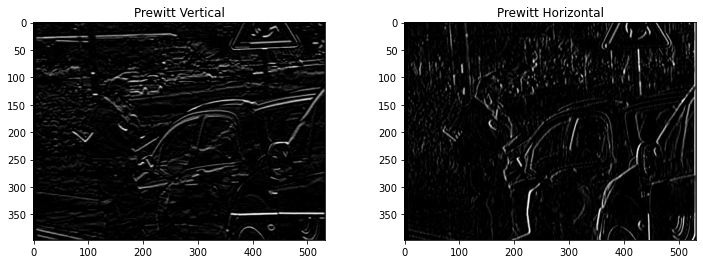

In [20]:
#Create the Prewitt edge detection masks

#grayscaling the original image in order to apply prewitt mask
gray = cv2.cvtColor(OrigCopduc, cv2.COLOR_BGR2GRAY)

x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewittx = cv2.filter2D(gray, -1, x) 
img_prewitty = cv2.filter2D(gray, -1, y)

#show horizontal and vertical edges in Copduck with Prewitt mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_prewittx,'gray') #vertical edges
ax[1].imshow(img_prewitty,'gray') #horizontal edges
plt.subplots_adjust(right = 1.7)
ax[0].set_title("Prewitt Vertical")
ax[1].set_title("Prewitt Horizontal") 

Text(0.5, 1.0, 'The Prewitt operator applied to Copduck')

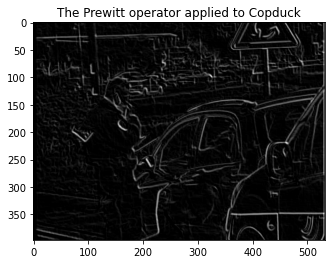

In [21]:
#Create and show ‘The Prewitt operator applied to Copduck’

prew = cv2.addWeighted(img_prewittx, 0.5, img_prewitty, 0.5, 0) #for prewitt img with weights
plt.imshow(prew,'gray')
plt.title("The Prewitt operator applied to Copduck")

# Task 2 - Bit Planes

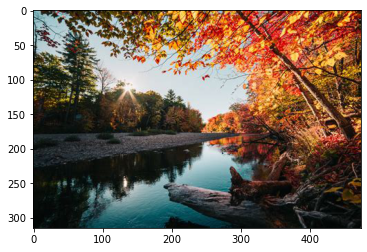

In [22]:
#open the org river img
riverimg = Image.open('river.jfif') 
plt.imshow(riverimg)

Text(0.5, 1.0, 'River image in 8-bit')

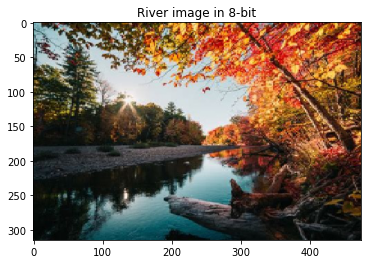

In [23]:
#the input image is original river img
input = cv2.imread('river.jfif')
 
#get river img size
height, width = input.shape[:2]

#desired size of the image (2^8) - 8bit
w, h = (256, 256)
 
#resizing the river image with 8bit
res = cv2.resize(input, (w, h), interpolation=cv2.INTER_LINEAR)

#init resized image as output
output = cv2.resize(res, (width, height), interpolation=cv2.INTER_NEAREST)
cv2.imwrite("river8.jpg", output)
cv2.imread("river8.jpg") #read image
river8 = Image.open('river8.jpg') 
plt.imshow(river8)
plt.title("River image in 8-bit")


Text(0.5, 1.0, '8bit-planes of 8 bit river img')

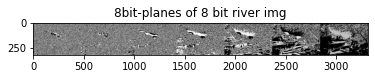

In [24]:
#read the 8bit river img as grayscale
img = cv2.imread("river8.jpg",0) 

lst = []

for n in range(0, 7):
    #create an image for each n-bit plane
    bitpln = np.full((img.shape[0], img.shape[1]), 2 ** n, np.uint8)
    # execute bitwise and operation
    result = cv2.bitwise_and(bitpln, img)
    # multiply ones (bit plane sliced) with 255 just for better visualization
    x = result * 255
    lst.append(x)
    
plt.imshow(np.hstack(lst),'gray')

plt.title("8bit-planes of 8 bit river img")



Text(0.5, 1.0, '8bit-planes of 8 bit river img')

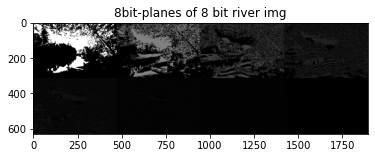

In [25]:
#read the 8bit river img as grayscale
img = cv2.imread("river8.jpg",0) 
 
lst = []

#change each pixel value to binary using np.binary_repr() and store in the lst array
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) #width as num of bits
 
#multiply with 2^(n-1) and reshape the img
digit_8 = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
digit_7 = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
digit_6 = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
digit_5 = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
digit_4 = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
digit_3 = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
digit_2 = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
digit_1 = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
    
res1 = cv2.hconcat([digit_8,digit_7,digit_6,digit_5])
res2 = cv2.hconcat([digit_4,digit_3,digit_2,digit_1])
 
#concatenate vertical
result = cv2.vconcat([res1,res2])
 
cv2.imwrite('8bit-planes.png',result) #write image
cv2.imread('8bit-planes.png') #read image

img8 = Image.open('8bit-planes.png') 
plt.imshow(img8,'gray')
plt.title("8bit-planes of 8 bit river img")

Text(0.5, 1.0, '3 bit image with overlapping bitplane 7,6 and 5')

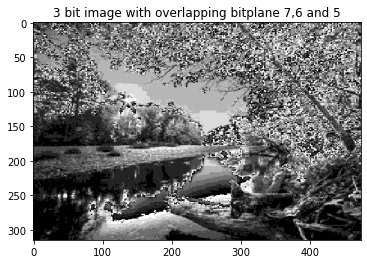

In [26]:
#3-bits image by overlapping Bitplane 7, 6 and 5
overlapped = digit_7 + digit_6 + digit_5

cv2.imwrite('overlap.png',overlapped) #write image
cv2.imread('overlap.png') #read image

#show image
img3 = Image.open('overlap.png') 
plt.imshow(img3,'gray')
plt.title("3 bit image with overlapping bitplane 7,6 and 5")
